## Задание 3(2)

### Тест 1 (коэффициент корреляции Пирсона)

Гипотезы:
- $H_0$: Отсутствие линейной связи между выборками ($r = 0$)
- $H_1$: Обратная линейная связь между выборками ($r < 0$)

Статистика:
$$t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}} \sim t_{n - 2}$$
где $r = \frac{cov(X, Y)}{\sqrt{S_X \cdot S_Y}}$ - корреляция Пирсона, $t_{n-2}$ - распределение Стьюдента с $n-2$ степенями свободы

Для выбранной альтернативы тест левосторонний:
$$pvalue = t_{n-2}(t)$$



In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import t, pearsonr, spearmanr

In [72]:
def print_function(sample1, sample2, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(sample1, sample2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [73]:
def pearson_less(sample1, sample2):
    n = len(sample1)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    
    var1 = sum((s1 - mean1)**2 for s1 in sample1)
    var2 = sum((s2 - mean2)**2 for s2 in sample2)
    cov = sum((sample1[i] - mean1) * (sample2[i] - mean2) for i in range(n))
    
    r = cov / np.sqrt(var1 * var2)
    t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
    p_value = t.cdf(t_stat, df = n - 2)

    return t_stat, r, p_value

def first_test(sample1, sample2, alpha = 0.05):
    statistic, corr, pvalue = pearson_less(sample1, sample2)
    pearson_scipy = pearsonr(sample1, sample2, alternative='less')
    result = "accept" if pvalue > alpha else "reject"
    
    print("Тест корреляции Пирсона")
    print(f"\tРезультат: {result}")
    print(f"\tПодробный результат: \n\t\t Correlation: {corr} \n\t\t Statistic: {statistic} \n\t\t P-value: {pvalue}")
    print(f"\tРезультат pearsonr из scipy: {pearson_scipy}")
    

### Тест 2 (коэффициент ранговой корреляции Спирмена)

Гипотезы:
- $H_0$: Отсутствие линейной связи между выборками ($r = 0$)
- $H_1$: Обратная линейная связь между выборками ($r < 0$)

Статистика:
$$t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}} \sim t_{n - 2}$$
где $r = 1 - \frac{6 \sum d^2}{n(n^2 - 1)}$ - ранговая корреляция Спирмена ($d_i = rank(X_i) - rank(Y_i)$), $t_{n-2}$ - распределение Стьюдента с $n-2$ степенями свободы

Для выбранной альтернативы тест левосторонний:
$$pvalue = t_{n-2}(t)$$

In [74]:
def second_test(sample1, sample2, alpha = 0.05):
    spearman_scipy = spearmanr(sample1, sample2, alternative='less')
    result = "accept" if spearman_scipy.pvalue > alpha else "reject"
   
    print("Тест ранговой корреляции Спирмена")
    print(f"\tРезультат: {result}")
    print(f"\tРезультат spearmanr из scipy: {spearman_scipy}")

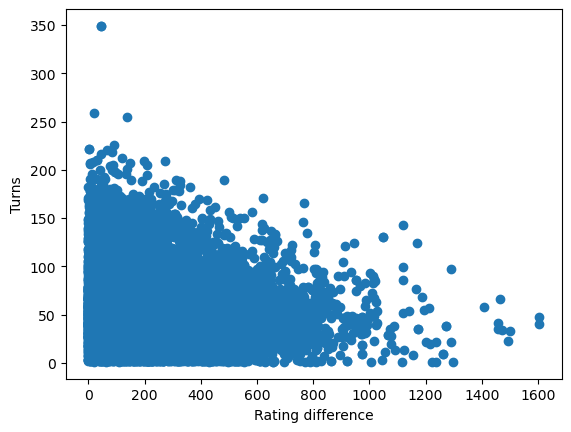

Тест корреляции Пирсона
	Результат: reject
	Подробный результат: 
		 Correlation: -0.12653085049762522 
		 Statistic: -18.064388203641222 
		 P-value: 1.139212103516649e-72
	Результат pearsonr из scipy: PearsonRResult(statistic=-0.12653085049762602, pvalue=1.1392121035145392e-72)

Тест корреляции Спирмена
	Результат: reject
	Результат spearmanr из scipy: SignificanceResult(statistic=-0.11586024861823566, pvalue=3.366417922748447e-61)


In [75]:
def main():
    data = pd.read_csv('chess_games.csv')
    sample1 = np.abs(data['white_rating'] - data['black_rating']).to_numpy()
    sample2 = data['turns'].to_numpy()
    
    print_function(sample1, sample2, xlabel='Rating difference', ylabel='Turns') 
    first_test(sample1, sample2)
    print()
    second_test(sample1, sample2)
    
if __name__ == '__main__':
    main()